In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Задание 1

### 1.1. Скачать следующие данные: kc-house-data

In [2]:
df = pd.read_csv('./kc-house-data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
pd.options.display.float_format ='{:,.0f}'.format

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,"21,613","21,613","21,613","21,613","21,613","21,613","21,613","21,613","21,613","21,613","21,613","21,613","21,613","21,613","21,613","21,613","21,613","21,613","21,613","21,613"
mean,"4,580,301,521","540,088",3,2,"2,080","15,107",1,0,0,3,8,"1,788",292,"1,971",84,"98,078",48,-122,"1,987","12,768"
std,"2,876,565,571","367,127",1,1,918,"41,421",1,0,1,1,1,828,443,29,402,54,0,0,685,"27,304"
min,"1,000,102","75,000",0,0,290,520,1,0,0,1,1,290,0,"1,900",0,"98,001",47,-123,399,651
25%,"2,123,049,194","321,950",3,2,"1,427","5,040",1,0,0,3,7,"1,190",0,"1,951",0,"98,033",47,-122,"1,490","5,100"
50%,"3,904,930,410","450,000",3,2,"1,910","7,618",2,0,0,3,7,"1,560",0,"1,975",0,"98,065",48,-122,"1,840","7,620"
75%,"7,308,900,445","645,000",4,2,"2,550","10,688",2,0,0,4,8,"2,210",560,"1,997",0,"98,118",48,-122,"2,360","10,083"
max,"9,900,000,190","7,700,000",33,8,"13,540","1,651,359",4,1,4,5,13,"9,410","4,820","2,015","2,015","98,199",48,-121,"6,210","871,200"


### 1.2. Изучите стоимость недвижимости

Из основных статистик выше видно, что среднее значение цены - 540 088, минимальное - 75 000, максимальное - 7,7 млн. При этом 75-ый квантиль приходится на значение 645 000. При этом у нас высокое стандартное отклонение (около 367 000). Можно сделать вывод, что в наших данных много выбросов. Что подтверждает построенный ниже boxplot, по которому видно, что значения свыше примерно 1,2 млн являются потенциальными выбросами.

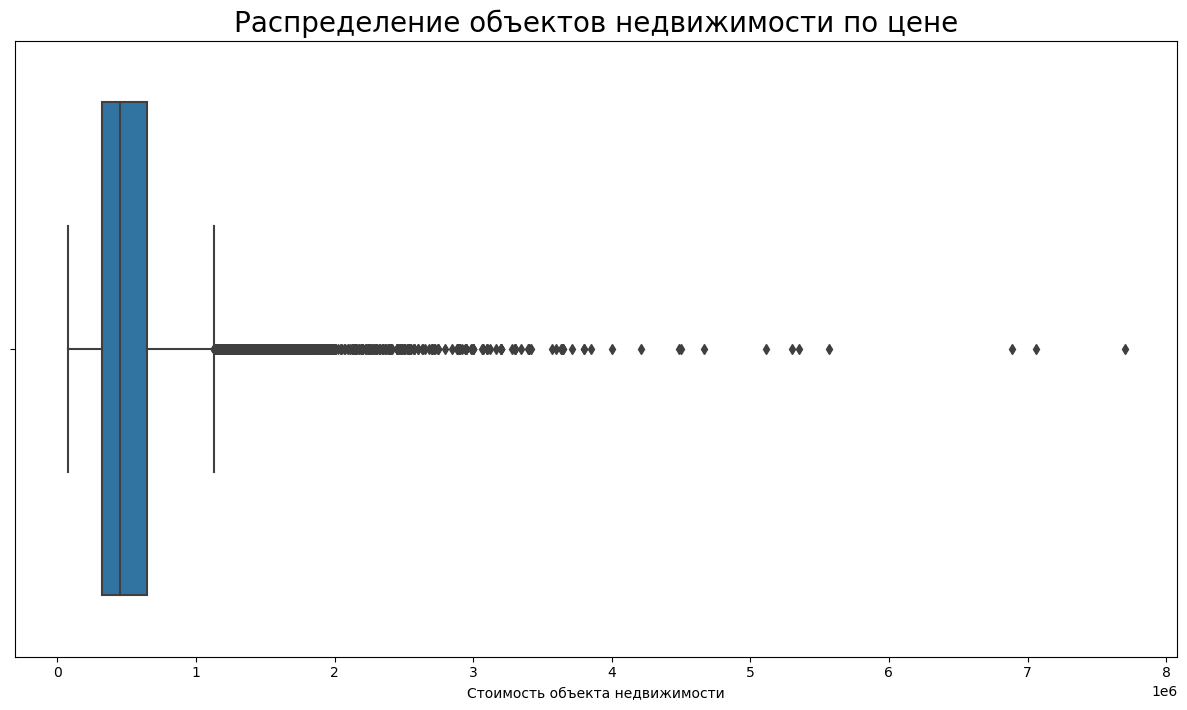

In [58]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df["price"])
plt.title('Распределение объектов недвижимости по цене', fontsize=20)
plt.xlabel('Стоимость объекта недвижимости');

Создаем массив значений для тиков с шагом в 200 000.

In [7]:
ticks_array_1 = [i for i in range(0, int(df['price'].max()), 200000)]

Строим гистограмму распределения объектов недвижимости по цене. При этом ограничиваем вывод значений по оси х (цена) стоимостью недвижимости в 2 000 000. За пределами 2 000 000 находится всего 0,92% от всей совокупности объектов, значит для наглядности их в данном случае можем отбросить.

In [8]:
np.round(df[df['price'] > 2000000]['price'].count()/df['price'].count()*100, 2)

0.92

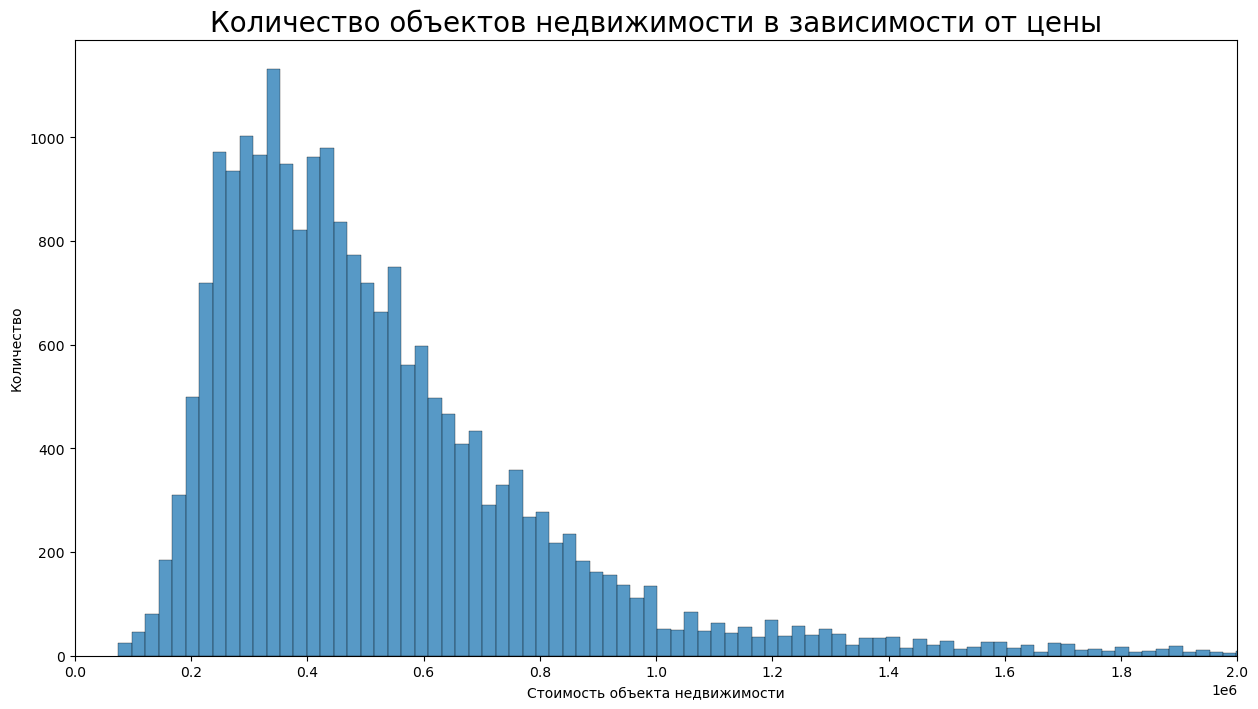

In [65]:
plt.figure(figsize=(15,8))
plot1 = sns.histplot(df['price'])
plt.title('Количество объектов недвижимости в зависимости от цены', fontsize=20)
plt.xlabel('Стоимость объекта недвижимости')
plt.ylabel('Количество')
plot1.set_xticks(ticks_array_1)
plt.xticks(rotation=0)
plt.xlim(0, 2000000); # ограничиваем отображаемые тики значениями до 2 млн $, т.к. значений выше этой суммы немного

Судя по гистограмме основная масса объектов недвижимости находится в ценовом диапазоне от 200 000 до 1 млн. Наиболее частотным ценовым диапазоном является значение порядка 350 000, что подтверждается методом value_counts (350 000 и 450 000 являются наиболее часто встречающимися значениями в данной выборке). На ценовой диапазон от 1 до 1,2 млн приходится всего 5.95% всех значений, на диапазон свыше 1,2 млн (этот  диапазон ранее был назван диапазоном, на который приходятся выбросы) - 4,54% значений.

In [10]:
df['price'].value_counts()

350,000      172
450,000      172
550,000      159
500,000      152
425,000      150
            ... 
607,010        1
1,362,500      1
298,800        1
957,500        1
402,101        1
Name: price, Length: 4028, dtype: int64

In [11]:
np.round(df[(df['price'] >= 1000000) & (df['price'] < 2000000)]['price'].count()/df['price'].count()*100, 2)

5.95

In [12]:
np.round(df[df['price'] > 1200000]['price'].count()/df['price'].count()*100, 2)

4.54

### 1.3. Изучите распределение квадратуры жилой

Средняя величина жилой площади составляет 2 080 кв.фут., разброс метража от 290 до 13 540 кв.футов, медианное значение - 1 910, 75% всех объектов недвижимости имеют площадь не выше 2 550 кв.футов. Следовательно как и по цене, так и по метражу структура совокупности неоднородна (в общем-то эти признаки взаимосвязаны).

In [13]:
df['sqft_living'].value_counts()

1300    138
1400    135
1440    133
1800    129
1660    129
       ... 
9890      1
5584      1
1961      1
5720      1
1425      1
Name: sqft_living, Length: 1038, dtype: int64

Создаем массив тиков

In [14]:
ticks_array_2 = [i for i in range(0, df['sqft_living'].max(), 200)]
len(ticks_array_2)

68

Строим гистограмму, используя массив тиков и ограничивая значения по оси х числом в 6000 кв.футов.

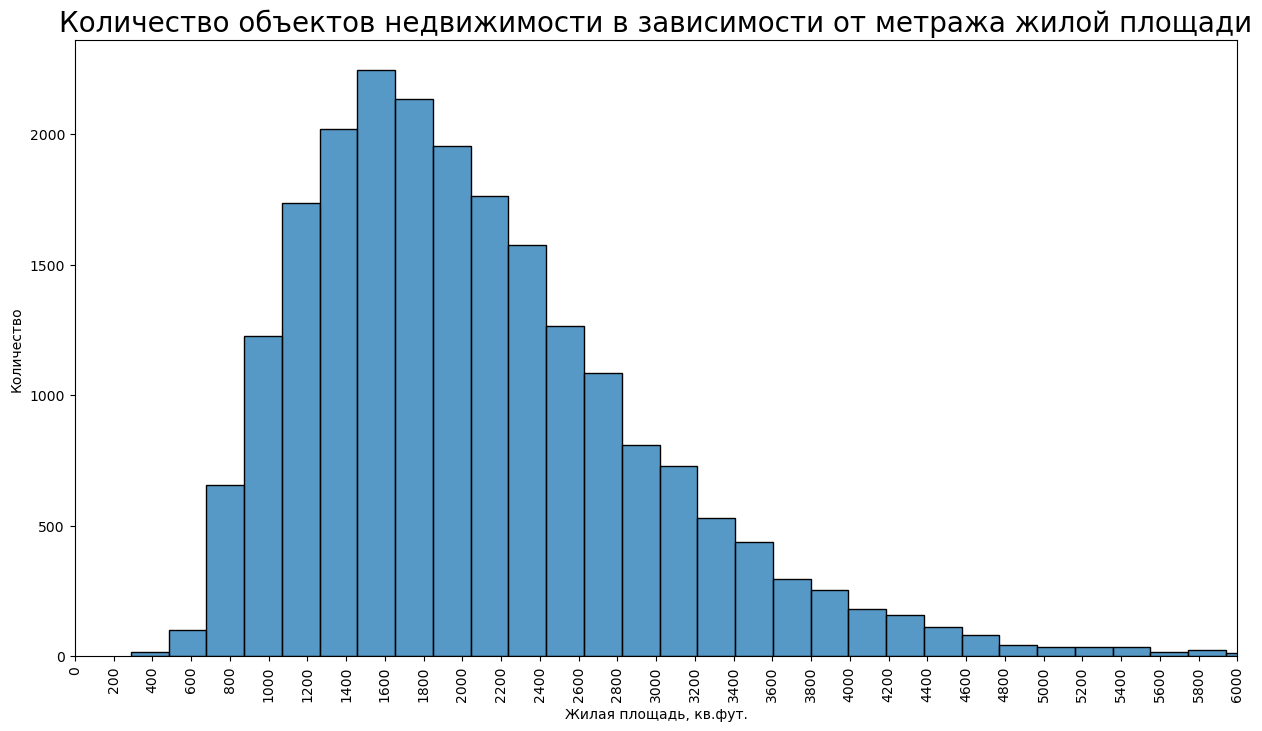

In [64]:
plt.figure(figsize=(15, 8))
plot2 = sns.histplot(df['sqft_living'], bins=len(ticks_array_2))
plt.title('Количество объектов недвижимости в зависимости от метража жилой площади', fontsize=20)
plt.xlabel('Жилая площадь, кв.фут.')
plt.ylabel('Количество')
plot2.set_xticks(ticks_array_2)
plt.xticks(rotation=90)
plt.xlim(0, 6000);

Основная масса объектов имеет жилую площадь от 700 до 3200 кв.футов. На долю таких объектов приходится 88,5% всех объектов. Наиболее часто встречающийся метраж - 1500 - 1900 кв.футов. Судя по боксплоту (ниже) значения свыше 4 250 кв.фут являются выбросами. На их долю приходится около 2.6% значений. На жилье метражом от 3 200 до 4 250 кв.футов - 8,3%.

In [16]:
np.round(df[(df['sqft_living'] >= 700) 
            & (df['sqft_living'] < 3200)]['sqft_living'].count() / df['sqft_living'].count() * 100, 1) 

88.5

<Axes: >

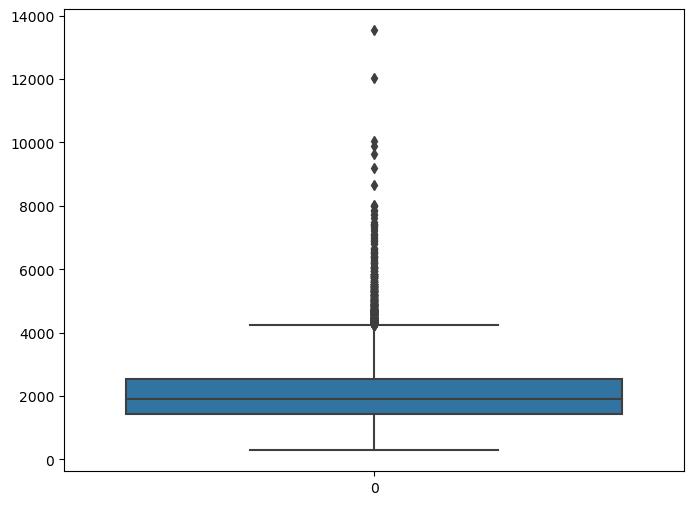

In [17]:
plt.figure(figsize=(8,6))
sns.boxplot(df['sqft_living'])

In [18]:
np.round(df[(df['sqft_living'] >= 4250)]['sqft_living'].count() / df['sqft_living'].count() * 100, 1) 

2.6

In [19]:
np.round(df[(df['sqft_living'] < 4250) & (df['sqft_living'] >= 3200 )]['sqft_living'].count() / df['sqft_living'].count() * 100, 1) 

8.3

### 1.4. Изучите распределение года постройки

In [20]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,"21,613","21,613","21,613","21,613","21,613","21,613","21,613","21,613","21,613","21,613","21,613","21,613","21,613","21,613","21,613","21,613","21,613","21,613","21,613","21,613"
mean,"4,580,301,521","540,088",3,2,"2,080","15,107",1,0,0,3,8,"1,788",292,"1,971",84,"98,078",48,-122,"1,987","12,768"
std,"2,876,565,571","367,127",1,1,918,"41,421",1,0,1,1,1,828,443,29,402,54,0,0,685,"27,304"
min,"1,000,102","75,000",0,0,290,520,1,0,0,1,1,290,0,"1,900",0,"98,001",47,-123,399,651
25%,"2,123,049,194","321,950",3,2,"1,427","5,040",1,0,0,3,7,"1,190",0,"1,951",0,"98,033",47,-122,"1,490","5,100"
50%,"3,904,930,410","450,000",3,2,"1,910","7,618",2,0,0,3,7,"1,560",0,"1,975",0,"98,065",48,-122,"1,840","7,620"
75%,"7,308,900,445","645,000",4,2,"2,550","10,688",2,0,0,4,8,"2,210",560,"1,997",0,"98,118",48,-122,"2,360","10,083"
max,"9,900,000,190","7,700,000",33,8,"13,540","1,651,359",4,1,4,5,13,"9,410","4,820","2,015","2,015","98,199",48,-121,"6,210","871,200"


In [21]:
df['yr_built'].value_counts()

2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

Самый старый дом в нашей выборке 1900-го года постройка, самый молодый - 2015 года. Медианное значение - 1975 г. 75% выборки были построены до 1997 г. По данному признаку выборку можно назвать однородной.

<Axes: >

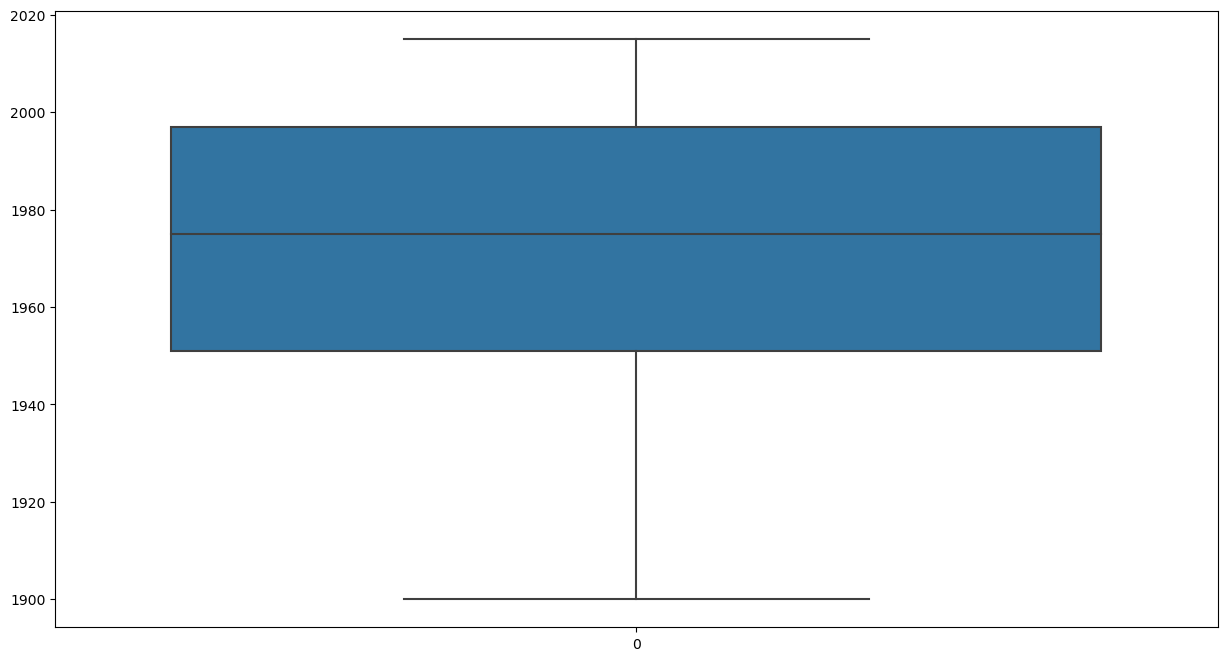

In [68]:
plt.figure(figsize=(15,8))
sns.boxplot(df['yr_built'])

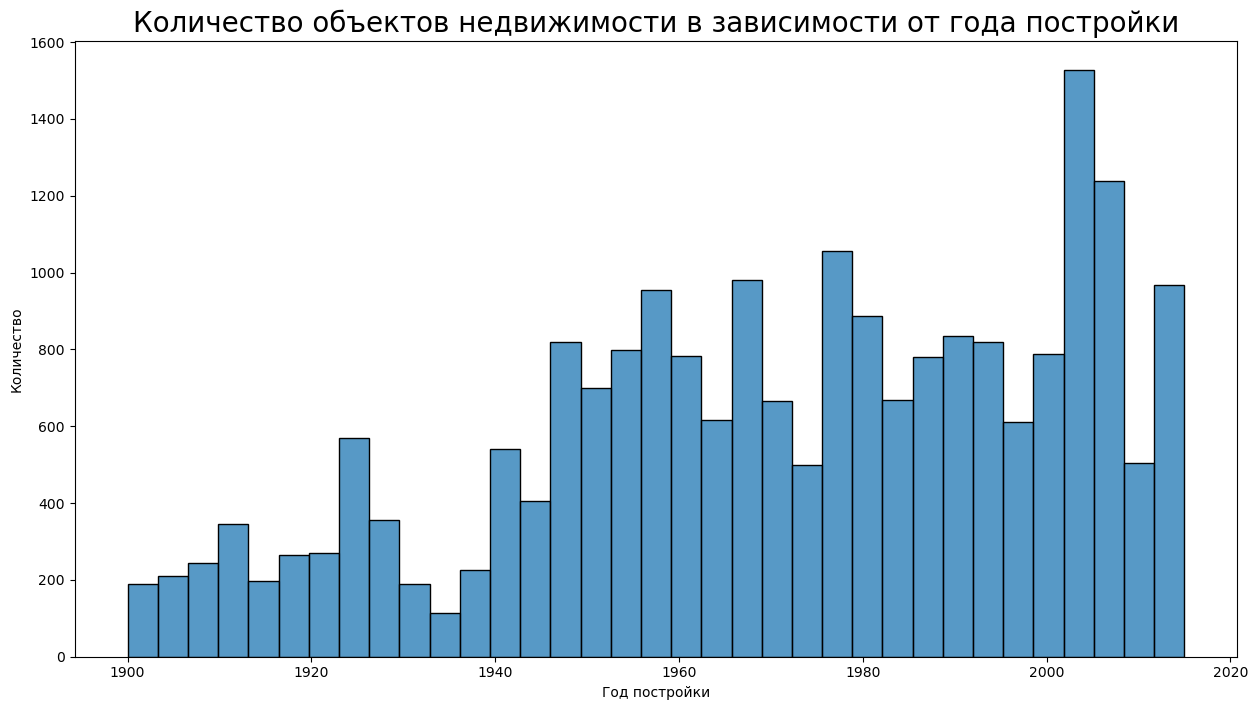

In [67]:
plt.figure(figsize=(15,8))
sns.histplot(df['yr_built'])
plt.title('Количество объектов недвижимости в зависимости от года постройки', fontsize=20)
plt.xlabel('Год постройки')
plt.ylabel('Количество');

Можно сказать, что на основе данного датафрейма можно судить нарастающих объемах строительства недвижимости в период с 1900 по 2015 год. Наибольшее количество объектов было построено в период 2004 - 2005 гг.

## Задание 2

### 2.1. Изучите распределение домов от наличия вида на набережную

Создаем новый датафрейм для построения круговой диаграммы

In [24]:
data_1 = df['waterfront'].value_counts()

Переименовываем значения строк по словарю

In [25]:
data_1.rename(index={0: 'нет вида на набережную', 1: 'есть вид на набережную'}, inplace=True)

Создаем переменные для хранения значений серий в data_1

In [26]:
names = data_1.index
values = data_1.values

Строим круговую диаграмму

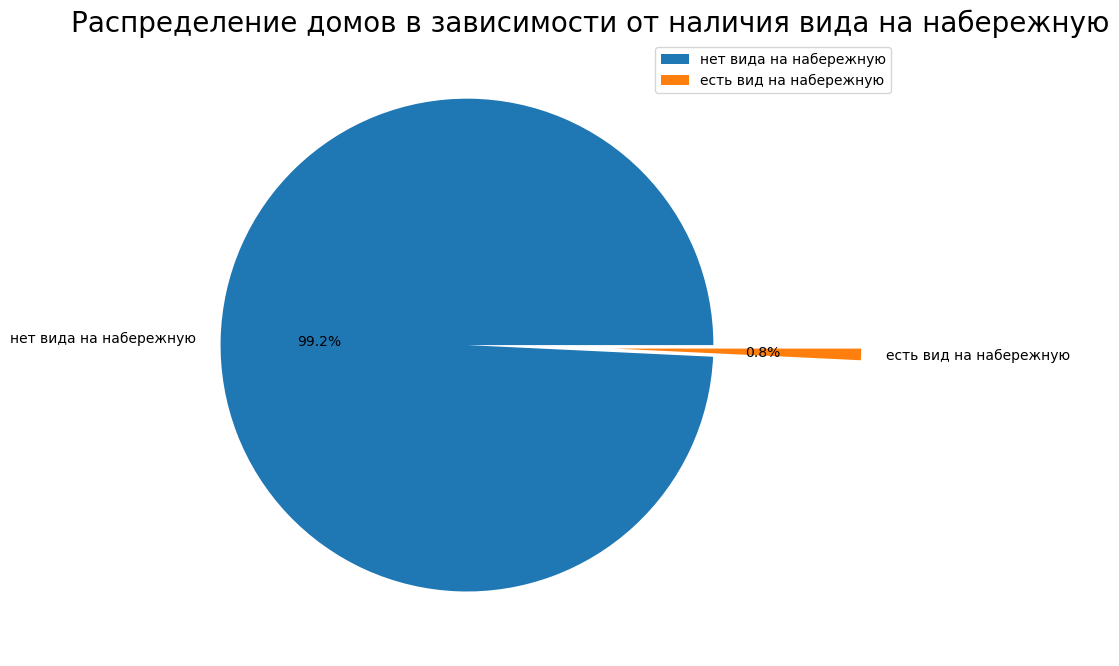

In [70]:
plt.figure(figsize=(15,8))
expl1=[0.5, 0.1]
plt.pie(values, autopct='%1.1f%%', labels=names, explode=expl1)
plt.title('Распределение домов в зависимости от наличия вида на набережную', fontsize=20)
plt.legend(names, loc='best');

Всего 0,8 % проданных за рассматриваемый период домов имели вид на набережную

### 2.2. Изучите распределение этажей домов

In [28]:
data_2 = df['floors'].value_counts()
data_2

1    10680
2     8241
2     1910
3      613
2      161
4        8
Name: floors, dtype: int64

Вычисляем долю каждого из типов этажности и сохранияем эти значения в массив для подписи данных на графике

In [29]:
tick_labels=[str(int(data_2.values[i] / data_2.values.sum() * 100)) + '%' for i in range(len(data_2))]
tick_labels

['49%', '38%', '8%', '2%', '0%', '0%']

<Figure size 1500x800 with 0 Axes>

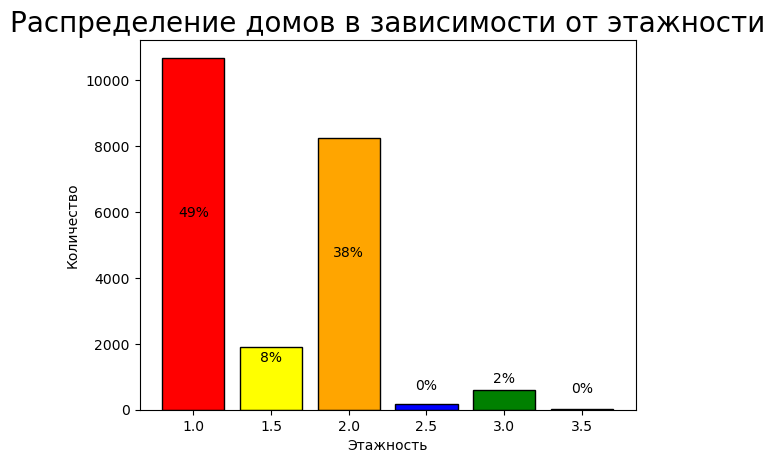

In [72]:
plt.figure(figsize=(15,8))
fig, ax = plt.subplots()
plot_3 = plt.bar(data_2.index, data_2.values, 
        color = ['red', 'orange', 'yellow', 'green', 'blue', 'violet'],
        width=0.4,
        linewidth=1.0, 
        edgecolor='black')
plt.title('Распределение домов в зависимости от этажности', fontsize=20)
plt.xlabel('Этажность')
plt.ylabel('Количество')
ax.bar_label(plot_3, labels=tick_labels, label_type='center', padding=15)
names2=data_2.index;

В данной совокупности объектов недвижимости более 10 000 объектов (49%) - одноэтажные дома, далее идут двухэтажные - 8 241 или 38%, чуть менее 2 000 - полутораэтажные дома (8%). 3 этажа имеют 2% процента всех проданных за период домов. Менее 1 процента приходится на дома в 2,5 и 3,5 этажа.

### 2.3. Изучите распределение состояния домов

In [31]:
data_3 = df['condition'].value_counts()

Text(0.5, 1.0, 'Распределение домов в завивимости от их состояния')

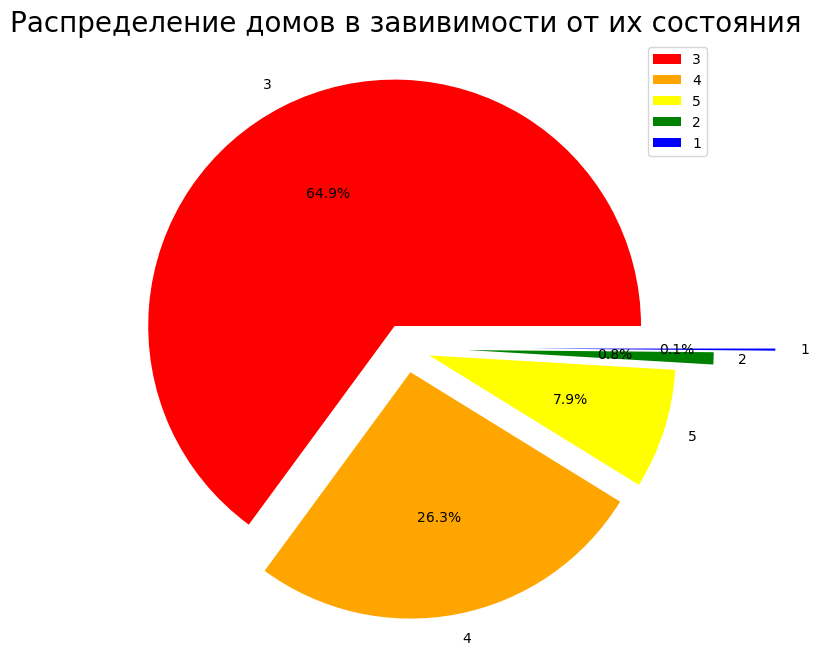

In [73]:
plt.figure(figsize=(15,8))
expl2=[0.1, 0.1, 0.1, 0.25, 0.5]
plt.pie(data_3.values, labels=data_3.index, autopct='%1.1f%%', explode=expl2, colors=['red', 'orange', 'yellow', 'green', 'blue', 'violet']);
plt.legend(data_3.index, loc='best')
plt.title('Распределение домов в завивимости от их состояния', fontsize=20)

Более половины домов (64,9%) находятся в состоянии, оцениваемом в 3 балла. Около четверти (26,3%) - 4 балла. В очень хорошем состоянии 7,9% домов. На долю домов в плохом состоянии приходитсясуммарно 0,9%.

## Задание 3

### Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

Для анализа влияния различных характеристик на стоимость недвижимости построим матрицу корреляции и создадим новый датафрейм, включающий только те признаки, которые влияют на цену

In [33]:
pd.options.display.float_format ='{:,.2f}'.format

In [34]:
corr_matrix = np.round(df.corr(), 2)
corr_matrix

C:\Users\nastyaduko\AppData\Local\Temp\ipykernel_14072\3248300746.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = np.round(df.corr(), 2)


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.00,-0.02,0.00,0.01,-0.01,-0.13,0.02,-0.00,0.01,-0.02,0.01,-0.01,-0.01,0.02,-0.02,-0.01,-0.00,0.02,-0.00,-0.14
price,-0.02,1.00,0.31,0.53,0.70,0.09,0.26,0.27,0.40,0.04,0.67,0.61,0.32,0.05,0.13,-0.05,0.31,0.02,0.59,0.08
bedrooms,0.00,0.31,1.00,0.52,0.58,0.03,0.18,-0.01,0.08,0.03,0.36,0.48,0.30,0.15,0.02,-0.15,-0.01,0.13,0.39,0.03
bathrooms,0.01,0.53,0.52,1.00,0.75,0.09,0.50,0.06,0.19,-0.12,0.66,0.69,0.28,0.51,0.05,-0.20,0.02,0.22,0.57,0.09
sqft_living,-0.01,0.70,0.58,0.75,1.00,0.17,0.35,0.10,0.28,-0.06,0.76,0.88,0.44,0.32,0.06,-0.20,0.05,0.24,0.76,0.18
sqft_lot,-0.13,0.09,0.03,0.09,0.17,1.00,-0.01,0.02,0.07,-0.01,0.11,0.18,0.02,0.05,0.01,-0.13,-0.09,0.23,0.14,0.72
floors,0.02,0.26,0.18,0.50,0.35,-0.01,1.00,0.02,0.03,-0.26,0.46,0.52,-0.25,0.49,0.01,-0.06,0.05,0.13,0.28,-0.01
waterfront,-0.00,0.27,-0.01,0.06,0.10,0.02,0.02,1.00,0.40,0.02,0.08,0.07,0.08,-0.03,0.09,0.03,-0.01,-0.04,0.09,0.03
view,0.01,0.40,0.08,0.19,0.28,0.07,0.03,0.40,1.00,0.05,0.25,0.17,0.28,-0.05,0.10,0.08,0.01,-0.08,0.28,0.07
condition,-0.02,0.04,0.03,-0.12,-0.06,-0.01,-0.26,0.02,0.05,1.00,-0.14,-0.16,0.17,-0.36,-0.06,0.00,-0.01,-0.11,-0.09,-0.00


In [35]:
corr_matrix[np.abs(corr_matrix) <= 0.3] = 0 # обнуляем коэффициент корреляции для значений меньше по абсолюту 0,3 (как несущественные) 
corr_matrix.columns # выводим список признаков, которые влияют на цену


Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

Создадим новый датафрейм, содержащий только те признаки, которые влияют на цену

In [36]:
df_new = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'view', 'grade',
       'sqft_above', 'sqft_basement', 'lat', 'sqft_living15']]
df_new.head()

,price,bedrooms,bathrooms,sqft_living,view,grade,sqft_above,sqft_basement,lat,sqft_living15
0,"221,900.00",3,1.00,1180,0,7,1180,0,47.51,1340
1,"538,000.00",3,2.25,2570,0,7,2170,400,47.72,1690
2,"180,000.00",2,1.00,770,0,6,770,0,47.74,2720
3,"604,000.00",4,3.00,1960,0,7,1050,910,47.52,1360
4,"510,000.00",3,2.00,1680,0,8,1680,0,47.62,1800


Построим новую матрицу коррелиции для сокращенного датафрейма

In [37]:
corr_matrix = np.round((df_new.corr()), 2)
corr_matrix

,price,bedrooms,bathrooms,sqft_living,view,grade,sqft_above,sqft_basement,lat,sqft_living15
price,1.00,0.31,0.53,0.70,0.40,0.67,0.61,0.32,0.31,0.59
bedrooms,0.31,1.00,0.52,0.58,0.08,0.36,0.48,0.30,-0.01,0.39
bathrooms,0.53,0.52,1.00,0.75,0.19,0.66,0.69,0.28,0.02,0.57
sqft_living,0.70,0.58,0.75,1.00,0.28,0.76,0.88,0.44,0.05,0.76
view,0.40,0.08,0.19,0.28,1.00,0.25,0.17,0.28,0.01,0.28
grade,0.67,0.36,0.66,0.76,0.25,1.00,0.76,0.17,0.11,0.71
sqft_above,0.61,0.48,0.69,0.88,0.17,0.76,1.00,-0.05,-0.00,0.73
sqft_basement,0.32,0.30,0.28,0.44,0.28,0.17,-0.05,1.00,0.11,0.20
lat,0.31,-0.01,0.02,0.05,0.01,0.11,-0.00,0.11,1.00,0.05
sqft_living15,0.59,0.39,0.57,0.76,0.28,0.71,0.73,0.20,0.05,1.00


In [38]:
corr_matrix[np.abs(corr_matrix) <= 0.3] = 0
corr_matrix

,price,bedrooms,bathrooms,sqft_living,view,grade,sqft_above,sqft_basement,lat,sqft_living15
price,1.00,0.31,0.53,0.70,0.40,0.67,0.61,0.32,0.31,0.59
bedrooms,0.31,1.00,0.52,0.58,0.00,0.36,0.48,0.00,0.00,0.39
bathrooms,0.53,0.52,1.00,0.75,0.00,0.66,0.69,0.00,0.00,0.57
sqft_living,0.70,0.58,0.75,1.00,0.00,0.76,0.88,0.44,0.00,0.76
view,0.40,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
grade,0.67,0.36,0.66,0.76,0.00,1.00,0.76,0.00,0.00,0.71
sqft_above,0.61,0.48,0.69,0.88,0.00,0.76,1.00,0.00,0.00,0.73
sqft_basement,0.32,0.00,0.00,0.44,0.00,0.00,0.00,1.00,0.00,0.00
lat,0.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
sqft_living15,0.59,0.39,0.57,0.76,0.00,0.71,0.73,0.00,0.00,1.00


<Axes: >

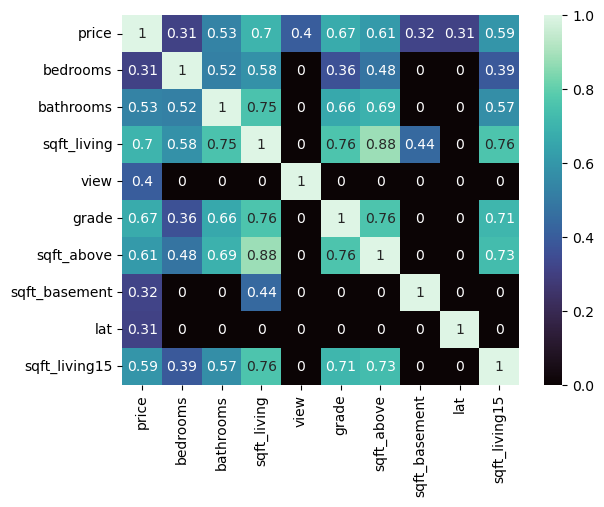

In [39]:
sns.heatmap(corr_matrix, annot=True, cmap='mako') # cmap - ищи в инете цветовые карты seaborn, так их много

In [40]:
low_mat = np.tril(df_new.corr())

<Axes: >

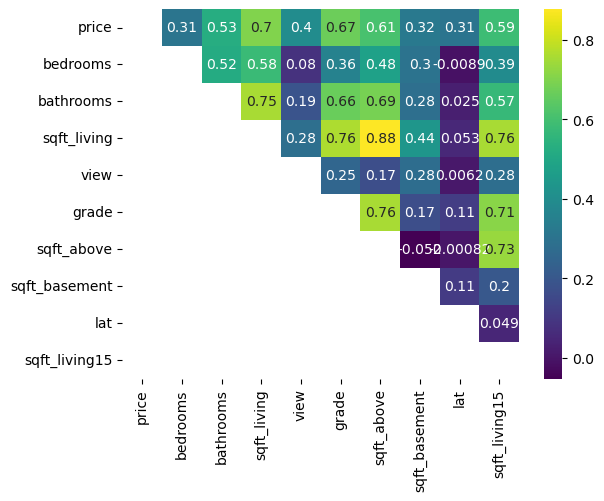

In [41]:
sns.heatmap(df_new.corr(), annot=True, cmap = 'viridis', mask = low_mat)

В данном анализе нам важна только верхняя строка тепловой карты - взаимсвязь цены с влияющими на неё признаками

**Изучим взаимосвязь цены с признками, которые на неё влияют**

### 1. Влияние количества спален на цену

Коэффициент корреляции между этими признаками составляет 0,31: слабая прямая связь.

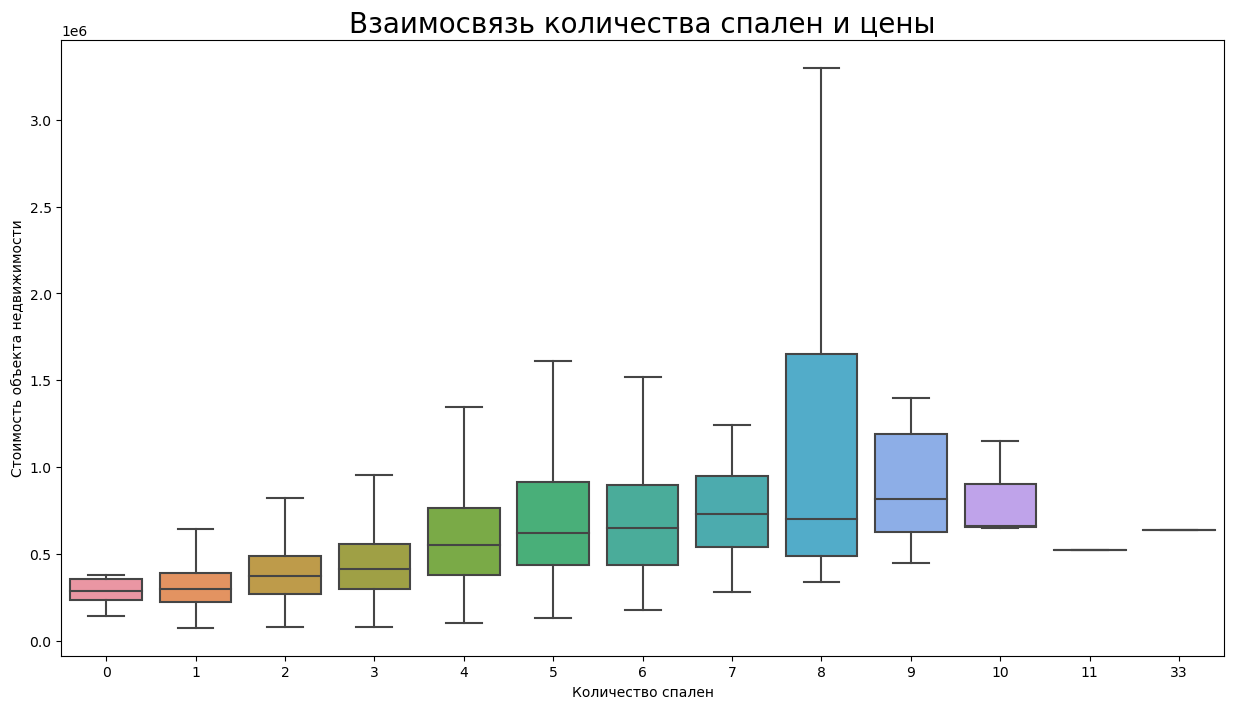

In [74]:
plt.figure(figsize=(15,8))
sns.boxplot(y=df['price'], x=df['bedrooms'], showfliers=False)
plt.title('Взаимосвязь количества спален и цены', fontsize=20)
plt.xlabel("Количество спален")
plt.ylabel("Стоимость объекта недвижимости");

Из боксплота выше видно, что с ростом количества спален растет и медианное значение цены. Самый большой разброс цен в домах с 8 спальнями (от 340 000 до 3,3 млн.), при этом медианное значение для таких домов даже ниже, чем для домов с 7 спальнями.

In [43]:
df[df['bedrooms'] == 8].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00
mean,"4,684,169,539.00","1,105,076.92",8.00,3.56,"3,800.00","8,971.62",1.69,0.00,0.23,3.54,8.08,"2,660.77","1,139.23","1,956.31",0.00,"98,081.85",47.63,-122.27,"2,265.38","7,355.92"
std,"3,251,513,576.31","897,495.73",0.00,1.01,"1,393.69","5,296.85",0.72,0.00,0.83,0.78,1.50,"1,338.60",640.46,31.24,0.00,45.01,0.08,0.07,"1,083.99","4,734.57"
min,"685,000,115.00","340,000.00",8.00,2.50,"2,280.00","2,580.00",1.00,0.00,0.00,3.00,7.00,"1,210.00",0.00,"1,901.00",0.00,"98,004.00",47.48,-122.36,"1,380.00","2,580.00"
25%,"1,652,500,060.00","490,000.00",8.00,2.75,"2,800.00","4,800.00",1.00,0.00,0.00,3.00,7.00,"1,880.00",920.00,"1,959.00",0.00,"98,055.00",47.62,-122.31,"1,560.00","3,750.00"
50%,"3,756,900,027.00","700,000.00",8.00,3.25,"3,840.00","7,500.00",2.00,0.00,0.00,3.00,8.00,"2,530.00","1,300.00","1,962.00",0.00,"98,105.00",47.63,-122.30,"1,780.00","7,624.00"
75%,"7,418,000,130.00","1,650,000.00",8.00,4.00,"4,300.00","11,750.00",2.00,0.00,0.00,4.00,8.00,"2,860.00","1,500.00","1,977.00",0.00,"98,112.00",47.67,-122.21,"2,170.00","8,640.00"
max,"9,126,101,740.00","3,300,000.00",8.00,6.00,"7,710.00","20,666.00",3.50,0.00,3.00,5.00,12.00,"6,090.00","2,020.00","1,997.00",0.00,"98,133.00",47.76,-122.13,"4,440.00","20,500.00"


### 2. Влияние площади ванных комнат на цену

Коэффициент корреляции между этими признаками составляет 0,53: слабая прямая связь. Учитывая, что значения признака 'bathrooms' носят непрерывный характер и имеют дробные значения, видимо речь идет не о количестве спальных комнат, а о их площади.

In [44]:
df['bathrooms'].value_counts()

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [45]:
df['bathrooms'].describe()

count   21,613.00
mean         2.11
std          0.77
min          0.00
25%          1.75
50%          2.25
75%          2.50
max          8.00
Name: bathrooms, dtype: float64

Для анализа взаимосвязи непрервных признаков сгруппируем выборку в 4 группы по площади ванных комнат исходя из значений квантилей. Для этого добавим в начальный датафрейм дополнительный признак "bathrooms_group"

In [46]:
df['bathrooms_group'] = 0

In [47]:
def bathrooms_to_group(x):
    if x < 1.75:
            return 1
    elif (1.75 <= x < 2.25):
            return 2
    elif 2.25 <= x < 2.5:
            return 3
    else:
            return 4
            
df['bathrooms_group'] = df['bathrooms'].apply(bathrooms_to_group)

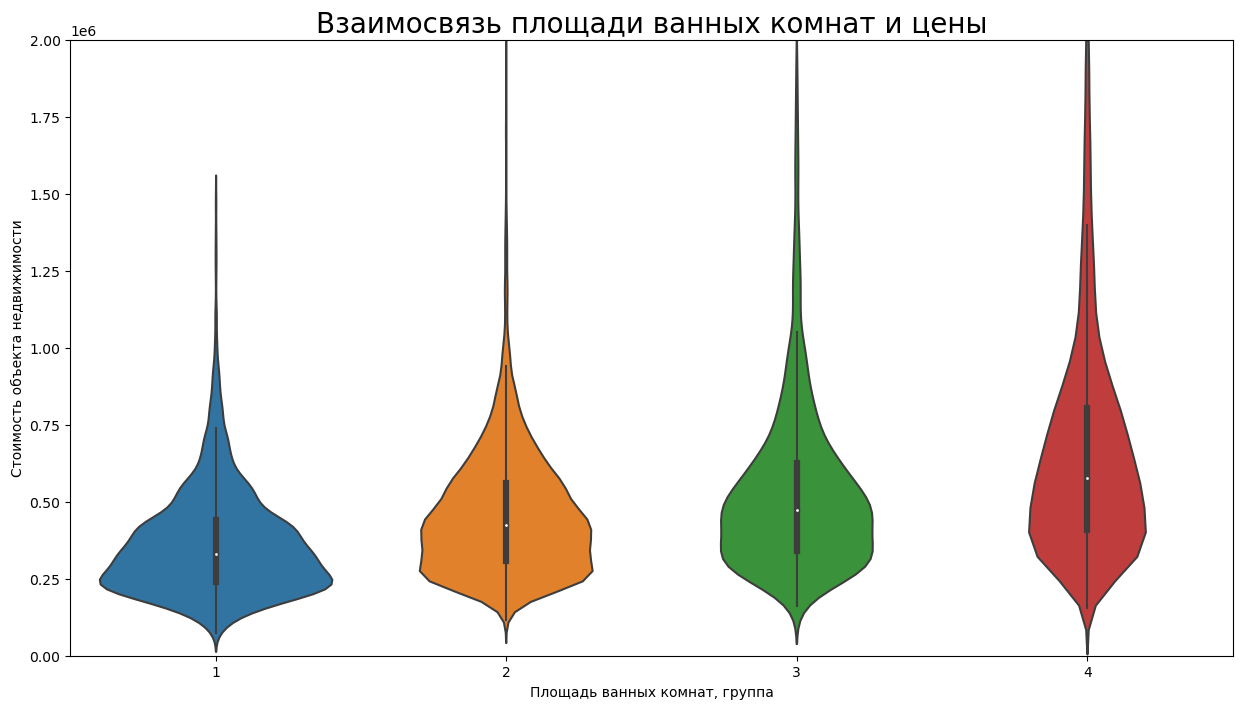

In [76]:
plt.figure(figsize=(15,8))
sns.violinplot(y=df['price'], x=df['bathrooms_group'])
plt.title('Взаимосвязь площади ванных комнат и цены', fontsize=20)
plt.ylabel("Стоимость объекта недвижимости")
plt.xlabel("Площадь ванных комнат, группа")
plt.ylim(0, 2000000);

Данные графика подтверждают, что с ростом площади ванных комнат растет и стоимость объекта

Возможно признак 'площадь ванных комнат' в объекте недвижимости влияет на цену опосредованно через признак 'размер жилой площади', поскольку с повышением размера жилой площади как правило увеличивается и площадь ванных комнат. При этом коэффициент корреляции между ценой и размером жилой площади составляет уже 0,7.

### 3. Влияние размера жилой площади на цену

Коэффициент корреляции между двумя этими признаками 0,7: средний уровень прямой связи. Среди рассматриваемых признаков размер жилой площади наиболее сильно влияет на цену.

In [49]:
df['sqft_living'].describe()

count   21,613.00
mean     2,079.90
std        918.44
min        290.00
25%      1,427.00
50%      1,910.00
75%      2,550.00
max     13,540.00
Name: sqft_living, dtype: float64

In [50]:
df['sqft_living_group'] = 0

In [51]:
def sqft_living_to_group(x):
    if x < 1427:
            return 1
    elif (1427 <= x < 1910):
            return 2
    elif 1910 <= x < 2550:
            return 3
    else:
            return 4
            
df['sqft_living_group'] = df['sqft_living'].apply(sqft_living_to_group)

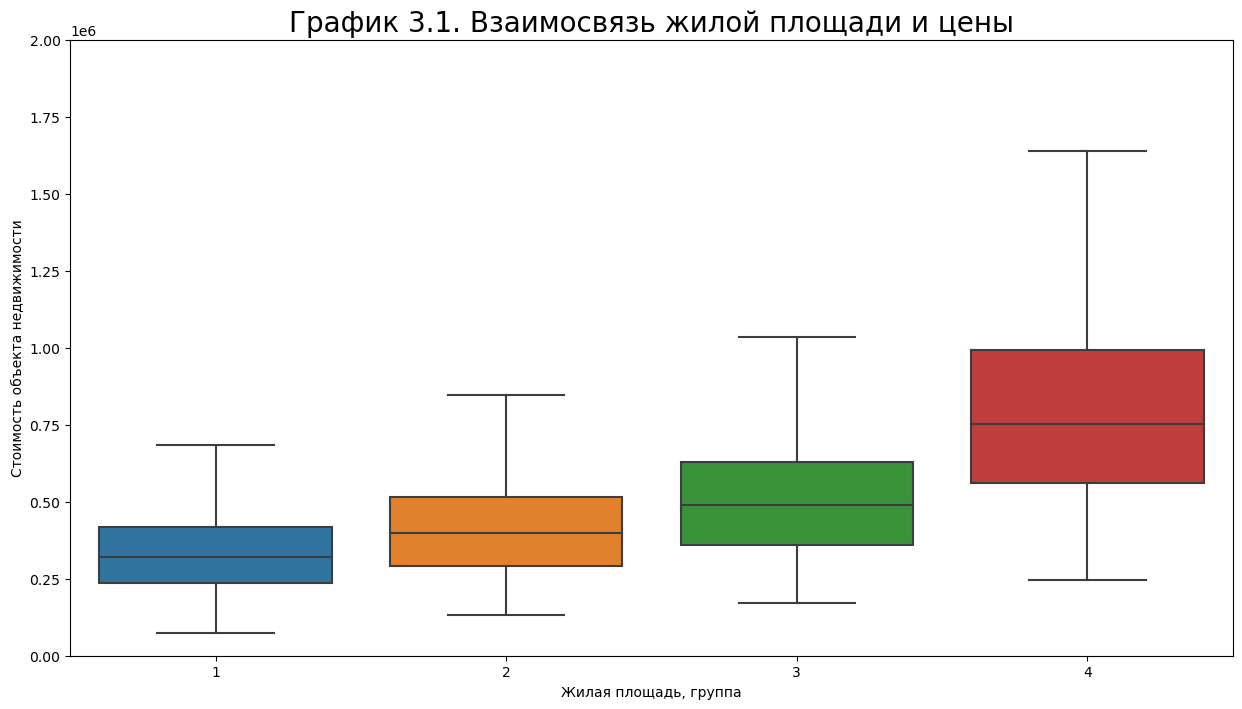

In [77]:
plt.figure(figsize=(15,8))
sns.boxplot(y=df["price"], x=df["sqft_living_group"], showfliers=False)
plt.title('График 3.1. Взаимосвязь жилой площади и цены', fontsize=20)
plt.ylabel("Стоимость объекта недвижимости")
plt.xlabel("Жилая площадь, группа")
plt.ylim(0, 2000000);

Судя по графику с переходом к более высоким группам жилой площади объекта недвижимости растет и его цена. Причем для объектов группы 4 (те объекты, площадь которыч првышает значения 3 квантиля), темп прироста цены увеличивается. Возможно повышение цены происходит за счет роста статусности жилья или, как вариант, так влияют выбросы. Проверим эту версию. Попробуем исключить из выборки значения выбросов и постмотреть на распределение цены в 4-ой группе по жилой площади.

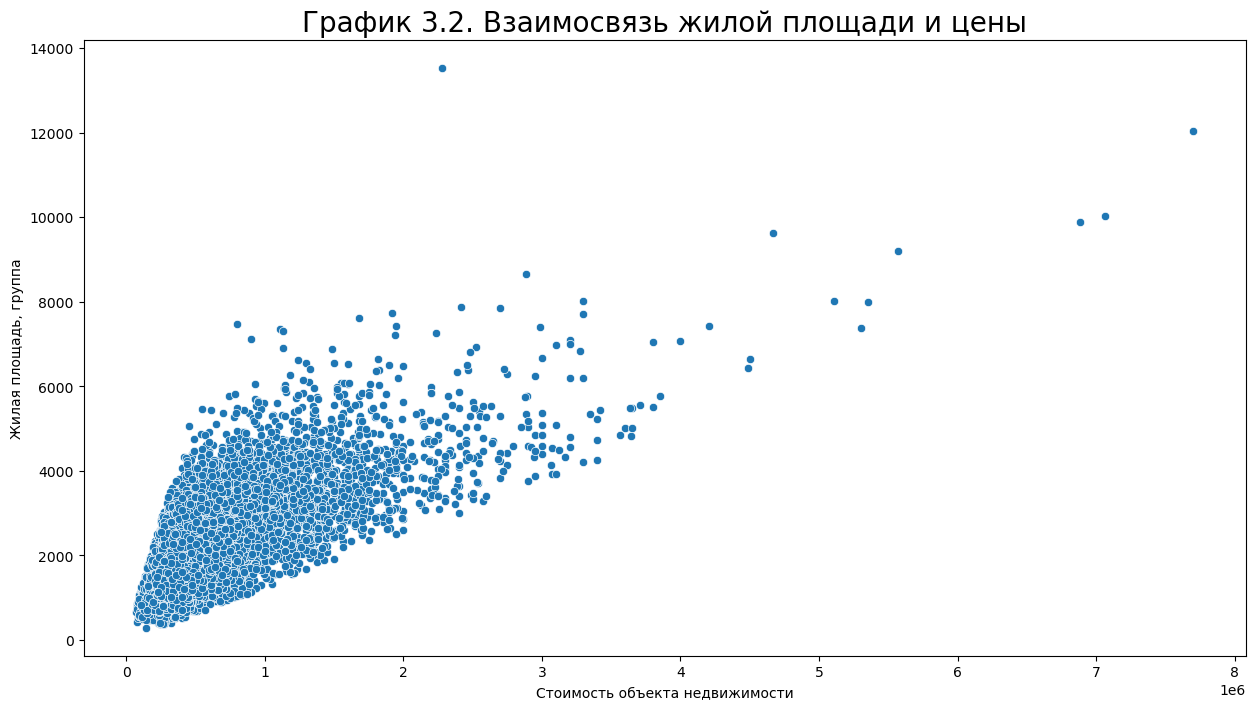

In [78]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=df["price"], y=df["sqft_living"])
plt.title('График 3.2. Взаимосвязь жилой площади и цены', fontsize=20)
plt.xlabel("Стоимость объекта недвижимости")
plt.ylabel("Жилая площадь, группа");

Предположительно объекты с жилой площадью свыше 6000 можно отнести к выбросам

In [54]:
df.shape

(21613, 23)

In [55]:
data_4 = df.loc[df['sqft_living'] <= 6000 ]
data_4

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bathrooms_group,sqft_living_group
0,7129300520,20141013T000000,"221,900.00",3,1.00,1180,5650,1.00,0,0,...,0,1955,0,98178,47.51,-122.26,1340,5650,1,1
1,6414100192,20141209T000000,"538,000.00",3,2.25,2570,7242,2.00,0,0,...,400,1951,1991,98125,47.72,-122.32,1690,7639,3,4
2,5631500400,20150225T000000,"180,000.00",2,1.00,770,10000,1.00,0,0,...,0,1933,0,98028,47.74,-122.23,2720,8062,1,1
3,2487200875,20141209T000000,"604,000.00",4,3.00,1960,5000,1.00,0,0,...,910,1965,0,98136,47.52,-122.39,1360,5000,4,3
4,1954400510,20150218T000000,"510,000.00",3,2.00,1680,8080,1.00,0,0,...,0,1987,0,98074,47.62,-122.05,1800,7503,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,"360,000.00",3,2.50,1530,1131,3.00,0,0,...,0,2009,0,98103,47.70,-122.35,1530,1509,4,2
21609,6600060120,20150223T000000,"400,000.00",4,2.50,2310,5813,2.00,0,0,...,0,2014,0,98146,47.51,-122.36,1830,7200,4,3
21610,1523300141,20140623T000000,"402,101.00",2,0.75,1020,1350,2.00,0,0,...,0,2009,0,98144,47.59,-122.30,1020,2007,1,1
21611,291310100,20150116T000000,"400,000.00",3,2.50,1600,2388,2.00,0,0,...,0,2004,0,98027,47.53,-122.07,1410,1287,4,2


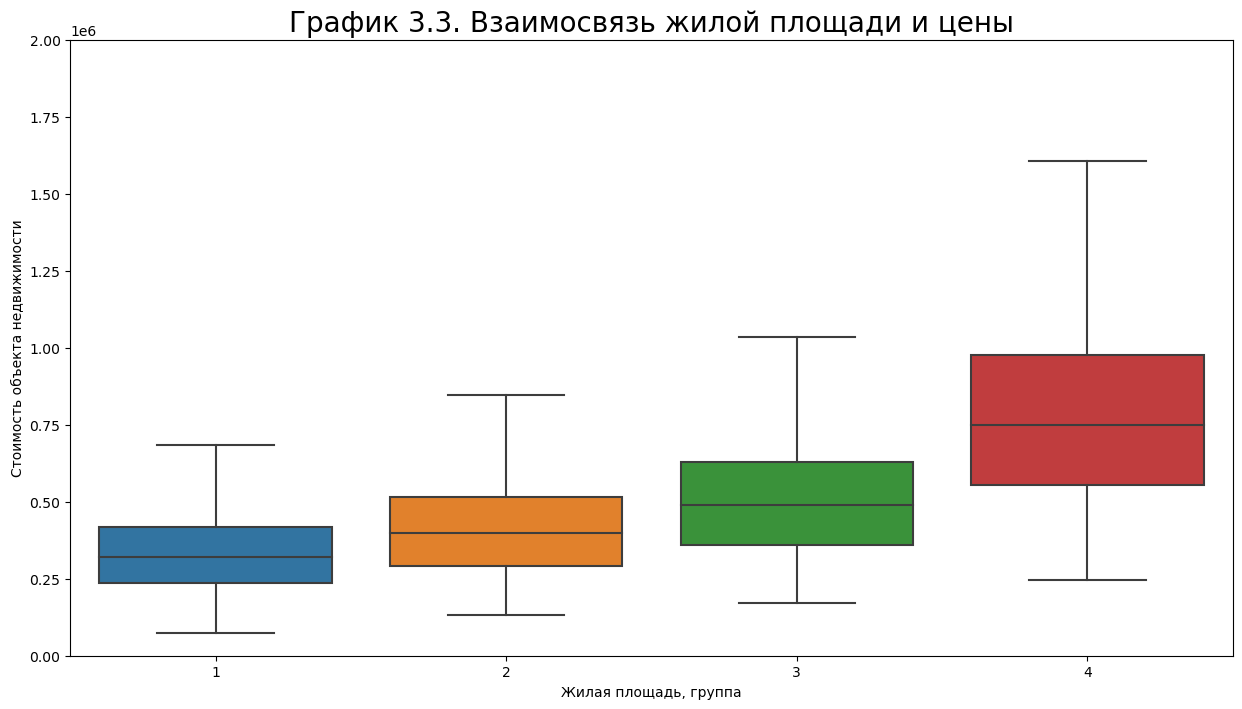

In [79]:
plt.figure(figsize=(15,8))
sns.boxplot(y=data_4["price"], x=data_4["sqft_living_group"], showfliers=False)
plt.title('График 3.3. Взаимосвязь жилой площади и цены', fontsize=20)
plt.ylabel("Стоимость объекта недвижимости")
plt.xlabel("Жилая площадь, группа")
plt.ylim(0, 2000000);

Сравнивая графики 3.1 и 3.2 (взаимосвязи жилой площади и цены) до и после исключения выбросов, можно сделать вывод, что выбросы не влияют существенно на резкий скачок цен для четвертой группы недвижимости. Можно предположить, что причиной такого скачка является повышение статусности домов большой площади и, как следствие, рост цены.